# Code to generate heatmap from Morris sensitivity analysis for the local SDGs systems model

In [1]:
# set working directory locations
import sys
sys.path.append(r'C:\temp')
sys.path.append(r'C:\Users\szeteyka\OneDrive - Deakin University\PhD\Models\Moallemi_et_al_SDG_SSP_Assessment-main')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## filtered version of top factors based on Morris ranking

In [3]:
sc = {2030:2000}    # Specify the number of scenarios where the convergence in the SA indices occures and was used for correlation analysis

# set working directory
directory = 'C:/temp/model/'

# real excel file with outcome variables
df_out = pd.read_excel(directory+'SensitivityVariables.xlsx', sheet_name='outcomes')

top_factors = {2030:
{"total population":5,
"Housing Land":5,
"housing demand":5,
"Total Other Productivity":5,
"Species Richness":5,
"inequality indicator":5,
"Safer Healthier People":5,
"Internet Service Demand":5,
"bus frequency required for travel equity":5}}

outcome_vars = list(top_factors[2030].keys())  # Specify the outcome of interest for SA ranking verification



In [4]:
# Create a dataframe of all uncertain parameters across all output indicators

# Specify the directory of the SA results
sa_dir = 'C:/temp/results/'

new_mu_df = pd.DataFrame()

for t, time in enumerate([2030]): 
    
    for i, outcome_var in enumerate(outcome_vars):    
        mu_df = pd.read_csv(sa_dir+"MorrisIndices_{}_sc{}_t{}_test.csv".format(outcome_var, sc[time], time))
        mu_df.set_index('Unnamed: 0', inplace=True)
        mu_df.index.names = ['Uncertainty']
        mu_df.rename(columns={'mu_star': outcome_var+' '+str(time)}, inplace=True)
        mu_df.drop(['mu_star_conf', 'mu', 'sigma'], axis=1, inplace=True)
        mu_df.sort_values(by=[outcome_var+' '+str(time)], ascending=False, inplace=True)
        mu_df2 = mu_df.head(20) # for time step 2030, 2050, 2100, we ploted and annotated all top 20 factors
        new_mu_df = pd.concat([new_mu_df, mu_df2], axis=1)

new_mu_df = new_mu_df.fillna(0)
normalized_df=(new_mu_df-new_mu_df.min())/(new_mu_df.max()-new_mu_df.min())

uncertainties = normalized_df.index.values.tolist()
labels = pd.DataFrame(index=list(normalized_df.columns.values) , columns=uncertainties)
labels = labels.replace(np.nan, '', regex=True)


# Here annotate all top factors rather than those identified through correlation analysis
for i, outcome_var in enumerate(list(normalized_df.columns.values)):
    if i<50:
        t = 2030
    elif i<60:
        t = 2100
    # Assumes year is 4 digits
    outcome_noyear = outcome_var[:-5]
    topfactor = list(normalized_df.nlargest(top_factors[t][outcome_noyear], outcome_var).index)
    for j, factor in enumerate(topfactor):
        labels.loc[outcome_var, factor] = str(j+1)

normalized_df_T = normalized_df.transpose()

labels_year = {}
normalized_df_T_year = {}

labels_year[2030] = labels[0:20]

normalized_df_T_year[2030] = normalized_df_T[0:20]


## Horizontal heatmap code

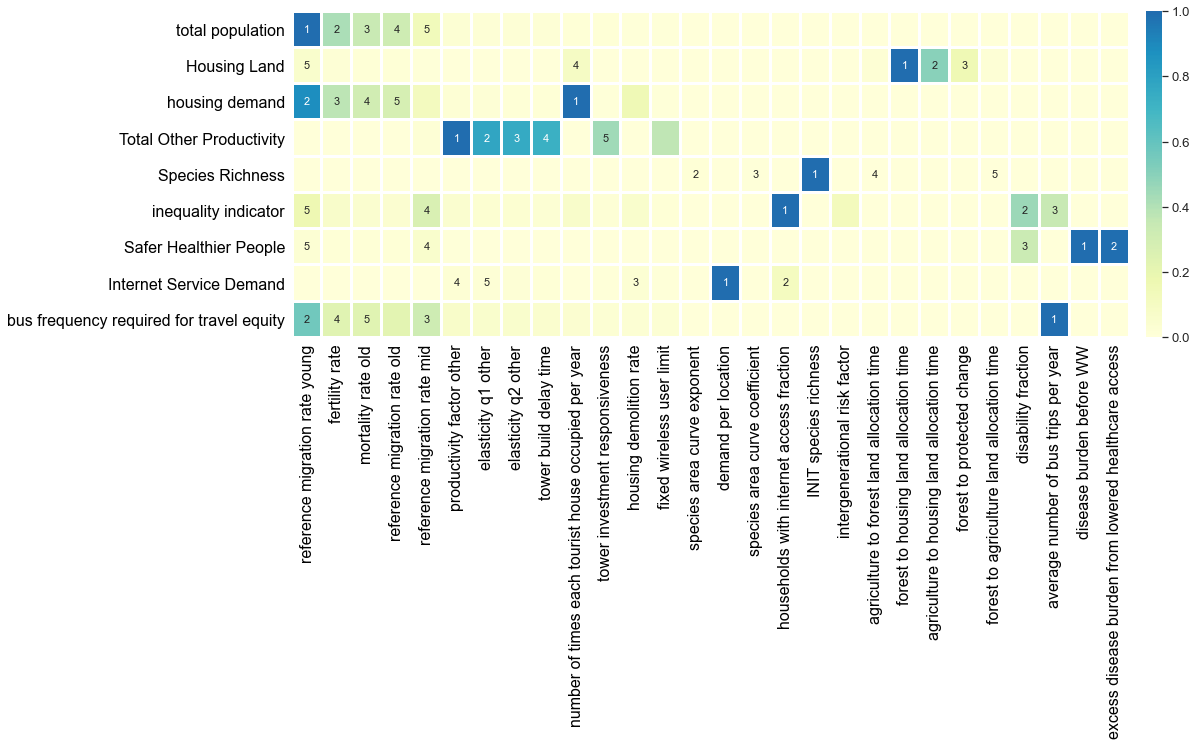

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.set(font_scale=1.2)

sns.heatmap(normalized_df_T, center=.7, vmin=0, vmax=1, fmt = '', cmap='YlGnBu',annot=labels, annot_kws={ 'size':11, "ha": 'center',"va": 'center'},
            cbar_kws = dict({'ticks': [0, .2, .4, .6, .8, 1]}, use_gridspec=False,location="right",pad=0.15, anchor=(1.3, 0)),
                linewidths=2, xticklabels=True, yticklabels=True, ax=ax)

ylabels = ax.get_yticklabels()
# cut last 5 chars off - removes year from label
ylabels = [item.get_text()[:-5] for item in ylabels]
ax.set_yticklabels(ylabels, fontsize=16)

xlabels = ax.get_xticklabels()
#xlabels = [item.get_text()[:-10] for item in xlabels]
ax.set_xticklabels(xlabels, fontsize=16)

#ax.xaxis.tick_top()
ax.tick_params(axis='x', rotation=90)
ax.tick_params(left=False, bottom=False, top=False)

plt.subplots_adjust(wspace=.1, hspace=.09)

# datetime object containing current date and time
now = datetime.now()
 
# dd/mm/YY H:M:S
dt_string = now.strftime("%Y%M%d-%H%M")
#print("date and time =", dt_string)

plt.savefig('C:/temp/figs/{}_Morris_topfactors_300dpi.png'.format(dt_string), dpi=300,  bbox_inches='tight') 
plt.savefig('C:/temp/figs/{}_Morris_topfactors.png'.format(dt_string), dpi=600,  bbox_inches='tight') 
plt.savefig('C:/temp/figs/{}_Morris_topfactors.pdf'.format(dt_string), dpi=600,  bbox_inches='tight') 

plt.show()